In [95]:
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from signals import *
from plots import *
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

In [103]:
listdir()

['.DS_Store',
 '.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 '__pycache__',
 'errors_3_10_1.npy',
 'errors_3_1_0.npy',
 'errors_3_1_1.npy',
 'errors_3_1_2.npy',
 'errors_3_1_3.npy',
 'errors_3_2_0.npy',
 'errors_3_2_1.npy',
 'errors_3_2_2.npy',
 'errors_3_2_3.npy',
 'errors_3_3_0.npy',
 'errors_3_3_1.npy',
 'errors_3_3_2.npy',
 'errors_3_3_3.npy',
 'errors_4_1_0.npy',
 'errors_4_1_1.npy',
 'errors_4_1_2.npy',
 'errors_4_1_3.npy',
 'errors_4_1_4.npy',
 'errors_4_2_0.npy',
 'errors_4_2_1.npy',
 'errors_4_2_2.npy',
 'errors_4_2_3.npy',
 'errors_4_2_4.npy',
 'errors_4_3_0.npy',
 'errors_4_3_1.npy',
 'errors_4_3_2.npy',
 'errors_4_3_3.npy',
 'errors_4_3_4.npy',
 'errors_4_4_3.npy',
 'errors_5_1_0.npy',
 'errors_5_1_3.npy',
 'errors_6_1_0.npy',
 'errors_6_1_3.npy',
 'errors_7_1_0.npy',
 'errors_7_1_3.npy',
 'errors_8_1_0.npy',
 'errors_8_1_3.npy',
 'errors_9_1_0.npy',
 'errors_9_1_3.npy',
 'example1.py',
 'nsr_3_10_1.npy',
 'nsr_3_1_0.npy',
 'nsr_3_1_1.npy',
 'nsr_3_1_2.npy',
 'ns

In [109]:
results = np.empty((2,4,10))
all_errors = np.empty((4,10,50*13))

In [110]:
for n in range(3,10):
    for nl in [0,3]:
        code = str(n)+"_1_"+str(nl)
#         nsr = np.load('nsr_'+code+'.npy')
        errors = np.load('errors_'+code+'.npy')
#         params = np.load('params_'+code+'.npy')
        results[0,nl,n] = np.degrees(np.percentile(errors, q=50))
        results[1,nl,n] = np.degrees(np.percentile(errors, q=95))
        
        all_errors[nl,n,:] = errors.flatten()


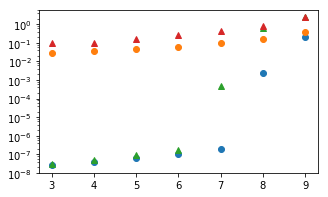

In [111]:
plt.semilogy(range(3,10),results[0,[0,3],3:10].T, 'o')
plt.semilogy(range(3,10),results[1,[0,3],3:10].T, '^')
plt.show()

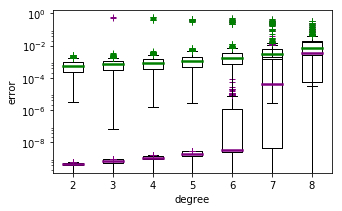

In [115]:
flierprops1 = dict(marker='+', markeredgecolor='purple')
medianprops1 = dict(linewidth=2.5, color='purple')
flierprops2 = dict(marker='+', markeredgecolor='green')
medianprops2 = dict(linewidth=2.5, color='green')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(all_errors[0,3:10,:].T, whis=[0, 95], flierprops=flierprops1, medianprops=medianprops1)
ax.boxplot(all_errors[3,3:10,:].T, whis=[0, 95], flierprops=flierprops2, medianprops=medianprops2)
ax.set_yscale('log')
plt.xticks(range(1,8),range(2,10))
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [108]:
results = np.empty((2,3,5,5))
all_errors = np.empty((3,5,5,50*13))

for overs in range(3):
    for n in range(4,5):
        for nl in range(5):
            code = str(n)+"_"+str(overs+1)+"_"+str(nl)
    #         nsr = np.load('nsr_'+code+'.npy')
            errors = np.load('errors_'+code+'.npy')
    #         params = np.load('params_'+code+'.npy')
            results[0,overs,nl,n] = np.degrees(np.percentile(errors, q=50))
            results[1,overs,nl,n] = np.degrees(np.mean(errors.flatten()))

            all_errors[overs,nl,n,:] = errors.flatten()


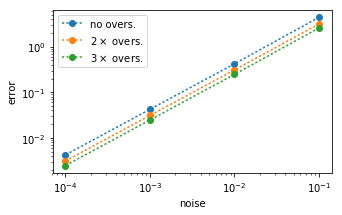

In [102]:
nse = 10.0**(-np.array(range(1,5)))
# plt.loglog(nse,results[0,:,1:,4].T, '--^')
plt.loglog(nse,results[1,:,1:,4].T, ':o')
# plt.semilogy(range(4),results[1,:,3:5], '^')
plt.xlabel("noise")
plt.ylabel("error")
plt.legend([r"no overs.",r"$2\times $ overs.",r"$3\times $ overs."])
plt.show()